In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc

import plotly.express as px
import plotly.graph_objects as go


In [39]:
def basicSVM(X_input, y_input):
    X_train, X_test, y_train, y_test = train_test_split(X_input, y_input, test_size=.1)
    svm_model = SVC(kernel='rbf', C=1.0) # kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} 
    svm_model.fit(X_train, y_train.values.ravel())
    y_pred = svm_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    
    trace1 = go.Scatter(x=X_test.iloc[:, 0], y=X_test.iloc[:, 1],
                        mode='markers', marker=dict(color=y_test, colorscale='Viridis', size=10),
                        name='Actual')

    trace2 = go.Scatter(x=X_test.iloc[:, 0], y=X_test.iloc[:, 1],
                        mode='markers', marker=dict(color=y_pred, colorscale='Viridis', size=5, opacity=0.5),
                        name='Predicted')

    layout = go.Layout(title=f'SVM Results (Accuracy: {accuracy:.2f})',
                        xaxis=dict(title='Feature 1'),
                        yaxis=dict(title='Feature 2'))

    fig = go.Figure(data=[trace1, trace2], layout=layout)

    fig.show()

    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    scores = cross_val_score(svm_model, X_input, y_input.values.ravel(), cv=cv, scoring='accuracy')

    print(f'Cross-Validation Accuracy: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})')

In [38]:
def SVM_ROC(X_input, y_input):
    X_train, X_test, y_train, y_test = train_test_split(X_input, y_input, test_size=.1)
    svm_model = SVC(kernel='poly', C=1.0, probability=True)  
    svm_model.fit(X_train, y_train.values.ravel())
    y_score = svm_model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(svm_model, X_input, y_input.values.ravel(), cv=cv, scoring='accuracy')

    print(f'Cross-Validation Accuracy: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})')

In [18]:
df = pd.read_csv("data_proc/games_wp_master.csv")
df["SCORE_DIFF"] = df["TEAM1_SCORE"] - df["TEAM2_SCORE"]
df["T1_WON"] = -1* (df["WINNER"] - 2)
df["T2_WON"] = -1 * (df["T1_WON"] - 1)
df.dropna(inplace=True)
display(df)
display(df.columns)

,Unnamed: 0,GAME_ID,SBR_GAME_ID,DATE,TEAM1_ID,TEAM2_ID,TEAM1_SCORE,TEAM2_SCORE,WINNER,away_prob,...,TEAM1_75wp,TEAM1_100wp,TEAM2_10wp,TEAM2_25wp,TEAM2_50wp,TEAM2_75wp,TEAM2_100wp,SCORE_DIFF,T1_WON,T2_WON
1400,1399,21500895,20160301_nba_Atlanta_Golden State,20160301.0,1610612737,1610612744,105.0,109.0,2,0.338983,...,0.586667,0.61,0.9,0.88,0.92,0.880000,0.87,-4.0,0,1
1428,1425,21500929,20160305_nba_Atlanta_L.A. Clippers,20160305.0,1610612737,1610612746,107.0,97.0,1,0.338983,...,0.573333,0.62,0.7,0.72,0.66,0.720000,0.69,10.0,1,0
1445,1444,21500938,20160307_nba_Memphis_Cleveland,20160307.0,1610612763,1610612739,106.0,103.0,1,0.083333,...,0.560000,0.60,0.7,0.72,0.72,0.720000,0.73,3.0,1,0
1482,1477,21500974,20160312_nba_Memphis_Atlanta,20160312.0,1610612763,1610612737,83.0,95.0,2,0.090909,...,0.560000,0.59,0.5,0.52,0.56,0.600000,0.61,-12.0,0,1
1486,1485,21500985,20160313_nba_Milwaukee_Brooklyn,20160313.0,1610612749,1610612751,109.0,100.0,1,0.555556,...,0.440000,0.49,0.3,0.24,0.28,0.320000,0.36,9.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,9640,22300008,20231110_nba_Philadelphia_Detroit,20231110.0,1610612755,1610612765,114.0,106.0,1,0.794872,...,0.720000,0.67,0.2,0.16,0.16,0.213333,0.22,8.0,1,0
9644,9646,22300011,20231110_nba_New Orleans_Houston,20231110.0,1610612740,1610612745,101.0,104.0,2,0.439560,...,0.493333,0.49,0.7,0.44,0.32,0.320000,0.29,-3.0,0,1
9645,9645,22300012,20231110_nba_Utah_Memphis,20231110.0,1610612762,1610612763,127.0,121.0,1,0.378072,...,0.386667,0.43,0.2,0.40,0.46,0.560000,0.55,6.0,1,0
9646,9641,22300013,20231110_nba_Minnesota_San Antonio,20231110.0,1610612750,1610612759,117.0,110.0,1,0.749355,...,0.520000,0.50,0.4,0.36,0.24,0.253333,0.31,7.0,1,0


Index(['Unnamed: 0', 'GAME_ID', 'SBR_GAME_ID', 'DATE', 'TEAM1_ID', 'TEAM2_ID',
       'TEAM1_SCORE', 'TEAM2_SCORE', 'WINNER', 'away_prob', 'away_spread',
       'away_total', 'TEAM1_10wp', 'TEAM1_25wp', 'TEAM1_50wp', 'TEAM1_75wp',
       'TEAM1_100wp', 'TEAM2_10wp', 'TEAM2_25wp', 'TEAM2_50wp', 'TEAM2_75wp',
       'TEAM2_100wp', 'SCORE_DIFF', 'T1_WON', 'T2_WON'],
      dtype='object')

In [40]:
basicSVM(df[['TEAM1_ID', 'TEAM2_ID', 'DATE', 'TEAM1_10wp', 'TEAM1_25wp', 'TEAM1_50wp',
       'TEAM1_75wp', 'TEAM1_100wp', 'TEAM2_10wp', 'TEAM2_25wp', 'TEAM2_50wp',
       'TEAM2_75wp', 'TEAM2_100wp']],
                df[["T1_WON"]])

Cross-Validation Accuracy: 0.57 (+/- 0.00)


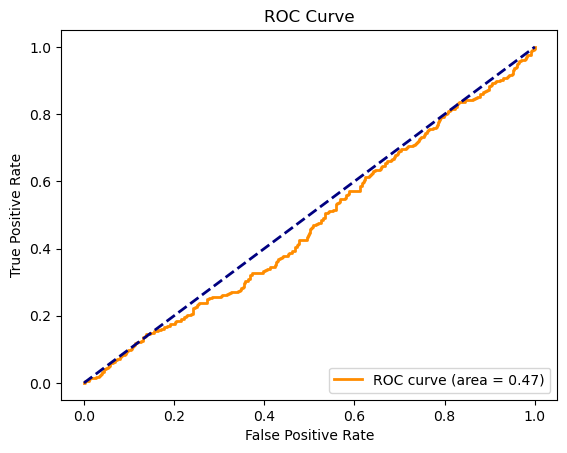

In [37]:
SVM_ROC(df[['TEAM1_ID', 'TEAM2_ID', 'DATE', 'TEAM1_10wp', 'TEAM1_25wp', 'TEAM1_50wp',
       'TEAM1_75wp', 'TEAM1_100wp', 'TEAM2_10wp', 'TEAM2_25wp', 'TEAM2_50wp',
       'TEAM2_75wp', 'TEAM2_100wp']],
                df[["T1_WON"]])